In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from catboost import Pool

In [137]:
total_data = pd.read_csv('total_data.csv')

In [138]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489119 entries, 0 to 489118
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         489119 non-null  int64  
 1   week                       489119 non-null  int64  
 2   center_id                  489119 non-null  int64  
 3   meal_id                    489119 non-null  int64  
 4   checkout_price             489119 non-null  float64
 5   base_price                 489119 non-null  float64
 6   emailer_for_promotion      489119 non-null  int64  
 7   homepage_featured          489119 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  489119 non-null  int64  
 10  region_code                489119 non-null  int64  
 11  center_type                489119 non-null  object 
 12  op_area                    489119 non-null  float64
 13  category                   48

In [139]:
total_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,price_last_curr_diff,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
489114,1255251,112,186,2956,6.369952,6.366522,0,0,4.418841,649,...,0.000000,5.265133,5.243387,4.867510,3.430377,3.564916,3.392163,3.023126,3.407195,3.076720
489115,1436164,113,186,2956,6.369952,6.368239,0,0,3.713572,649,...,0.000000,-0.485948,-0.520128,4.012208,3.398836,3.430377,3.564916,3.392163,3.023126,3.407195
489116,1000576,114,186,2956,6.369952,6.366522,0,0,3.332205,649,...,0.000000,4.529079,3.451919,0.406058,3.556204,3.398836,3.430377,3.564916,3.392163,3.023126
489117,1429037,115,186,2956,6.366522,6.369952,0,0,2.772589,649,...,0.000539,4.875622,4.882093,5.233347,3.097631,3.556204,3.398836,3.430377,3.564916,3.392163
489118,1285049,116,186,2956,5.680275,6.368239,0,0,4.812184,649,...,0.107790,5.956388,2.217077,5.377669,3.405601,3.097631,3.556204,3.398836,3.430377,3.564916


In [140]:
train_data = total_data.loc[total_data['train_test']=='train', :]
test_data = total_data.loc[total_data['train_test']=='test', :]


In [141]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456546 entries, 0 to 489118
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  int64  
 3   meal_id                    456546 non-null  int64  
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  int64  
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   456546 

In [142]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32573 entries, 145 to 489073
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32573 non-null  int64  
 1   week                       32573 non-null  int64  
 2   center_id                  32573 non-null  int64  
 3   meal_id                    32573 non-null  int64  
 4   checkout_price             32573 non-null  float64
 5   base_price                 32573 non-null  float64
 6   emailer_for_promotion      32573 non-null  int64  
 7   homepage_featured          32573 non-null  int64  
 8   num_orders                 0 non-null      float64
 9   city_code                  32573 non-null  int64  
 10  region_code                32573 non-null  int64  
 11  center_type                32573 non-null  object 
 12  op_area                    32573 non-null  float64
 13  category                   32573 non-null  objec

## CATBOOST

In [143]:
features = [col for col in train_data.columns if col not in ['id', 'num_orders', 'train_test']]
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5']

In [144]:
categorical_features_indices = np.where(train_data[features].dtypes =='object')[0]
categorical_features_indices

array([ 9, 11, 12])

In [145]:
X = train_data[features]
y = train_data['num_orders']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [146]:
x_train.shape

(342409, 25)

In [147]:
model = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.02, 
    max_depth=8, 
    l2_leaf_reg=10, 
    loss_function='RMSE',
    random_seed=2019,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    use_best_model=True
    )

In [148]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
errcb=[]
y_pred_test=[]

fold = KFold(n_splits=5,shuffle=True,random_state=2019)

for train_index, test_index in fold.split(x_train,y_train):
    X_train, X_valid =x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, y_valid = y_train.iloc[train_index],y_train.iloc[test_index]
    model.fit(X_train,Y_train,
              cat_features = categorical_features_indices,
              eval_set=(X_valid,y_valid),
              early_stopping_rounds=300,
              verbose=100)
    preds = model.predict(X_valid)
    print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(x_test)
    y_pred_test.append(p)

model.fit(X=x_train, y=y_train, eval_set=(x_train,y_train), cat_features=categorical_features_indices, verbose=100)

0:	learn: 1.1874855	test: 1.1892135	best: 1.1892135 (0)	total: 213ms	remaining: 7m 6s
100:	learn: 0.6126884	test: 0.6146398	best: 0.6146398 (100)	total: 17.4s	remaining: 5m 27s
200:	learn: 0.5623751	test: 0.5639633	best: 0.5639633 (200)	total: 33.2s	remaining: 4m 57s
300:	learn: 0.5462954	test: 0.5481013	best: 0.5481013 (300)	total: 48.9s	remaining: 4m 35s
400:	learn: 0.5353255	test: 0.5374264	best: 0.5374264 (400)	total: 1m 4s	remaining: 4m 17s
500:	learn: 0.5269918	test: 0.5293895	best: 0.5293895 (500)	total: 1m 20s	remaining: 4m 1s
600:	learn: 0.5207204	test: 0.5234587	best: 0.5234587 (600)	total: 1m 36s	remaining: 3m 45s
700:	learn: 0.5157053	test: 0.5187923	best: 0.5187923 (700)	total: 1m 53s	remaining: 3m 30s
800:	learn: 0.5112209	test: 0.5147511	best: 0.5147511 (800)	total: 2m 10s	remaining: 3m 15s
900:	learn: 0.5073826	test: 0.5113074	best: 0.5113074 (900)	total: 2m 27s	remaining: 2m 59s
1000:	learn: 0.5040840	test: 0.5084111	best: 0.5084111 (1000)	total: 2m 43s	remaining: 2m 4

CatBoostRegressor(iterations=2000, l2_leaf_reg=10, learning_rate=0.02, loss_function='RMSE', max_depth=8, od_type='Iter', od_wait=25, random_seed=2019, use_best_model=True, verbose=100)

In [149]:
y_pred = model.predict(x_test)

In [150]:
from sklearn.metrics import mean_squared_log_error
RMSEL_CB=mean_squared_log_error(y_test, y_pred)
RMSEL_CB=np.sqrt(RMSEL_CB)
RMSEL_CB

np.float64(0.09453278392371685)

## XGBoost

In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456546 entries, 0 to 489118
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  int64  
 3   meal_id                    456546 non-null  int64  
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  int64  
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   456546 

In [152]:
# Encoding categorical vars for these models
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()
train_data['category']=encoder.fit_transform(train_data['category'])
train_data['center_type']=encoder2.fit_transform(train_data['center_type'])
train_data['cuisine']=encoder3.fit_transform(train_data['cuisine'])
train_data.info()

C:\Users\parac\AppData\Local\Temp\ipykernel_21272\1125213969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['category']=encoder.fit_transform(train_data['category'])
C:\Users\parac\AppData\Local\Temp\ipykernel_21272\1125213969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['center_type']=encoder2.fit_transform(train_data['center_type'])
C:\Users\parac\AppData\Local\Temp\ipykernel_21272\1125213969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

<class 'pandas.core.frame.DataFrame'>
Index: 456546 entries, 0 to 489118
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  int64  
 3   meal_id                    456546 non-null  int64  
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  int64  
 11  center_type                456546 non-null  int64  
 12  op_area                    456546 non-null  float64
 13  category                   456546 

In [153]:
X = train_data[features]
y = train_data['num_orders']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [154]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342409 entries, 469914 to 327598
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   week                       342409 non-null  int64  
 1   center_id                  342409 non-null  int64  
 2   meal_id                    342409 non-null  int64  
 3   checkout_price             342409 non-null  float64
 4   base_price                 342409 non-null  float64
 5   emailer_for_promotion      342409 non-null  int64  
 6   homepage_featured          342409 non-null  int64  
 7   city_code                  342409 non-null  int64  
 8   region_code                342409 non-null  int64  
 9   center_type                342409 non-null  int64  
 10  op_area                    342409 non-null  float64
 11  category                   342409 non-null  int64  
 12  cuisine                    342409 non-null  int64  
 13  discount_on_base           34

In [155]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [156]:
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL_XG=mean_squared_log_error(y_test, y_pred)
RMSEL_XG=np.sqrt(RMSEL_XG)
print(RMSEL_XG)

0.0954965805637683


## LightGBM

In [157]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
lgb_model=LGBMRegressor(importance_type='gain')
lgbm_params = {
    "n_estimators":[230,260],
    "num_leaves":[41,51],
    'min_child_samples':[40,45,50],
    'random_state':[2019]
  
}
lgb_model.set_params(**lgbm_params) #base model

,boosting_type,'gbdt'
,num_leaves,"[41, 51]"
,max_depth,-1
,learning_rate,0.1
,n_estimators,"[230, 260]"
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,"[40, 45, ...]"


In [158]:
lgb_grid=GridSearchCV(lgb_model,lgbm_params,cv=5,scoring='neg_mean_squared_error',n_jobs=8)

In [159]:
LGB =lgb_grid.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3953
[LightGBM] [Info] Number of data points in the train set: 342409, number of used features: 25
[LightGBM] [Info] Start training from score 4.886469


In [160]:
y_pred=LGB.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL_LGB=mean_squared_log_error(y_test, y_pred)
RMSEL_LGB=np.sqrt(RMSEL_LGB)
RMSEL_LGB



np.float64(0.09405411050240513)

## Gradient Boost


In [161]:
train_data = total_data.loc[total_data['train_test']=='train', :]
test_data = total_data.loc[total_data['train_test']=='test', :]

In [162]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()
train_data['category']=encoder.fit_transform(train_data['category'])
train_data['center_type']=encoder2.fit_transform(train_data['center_type'])
train_data['cuisine']=encoder3.fit_transform(train_data['cuisine'])
train_data.info()

C:\Users\parac\AppData\Local\Temp\ipykernel_21272\2835093497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['category']=encoder.fit_transform(train_data['category'])
C:\Users\parac\AppData\Local\Temp\ipykernel_21272\2835093497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['center_type']=encoder2.fit_transform(train_data['center_type'])
C:\Users\parac\AppData\Local\Temp\ipykernel_21272\2835093497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

<class 'pandas.core.frame.DataFrame'>
Index: 456546 entries, 0 to 489118
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  int64  
 3   meal_id                    456546 non-null  int64  
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  int64  
 11  center_type                456546 non-null  int64  
 12  op_area                    456546 non-null  float64
 13  category                   456546 

In [163]:
features = [col for col in train_data.columns if col not in ['id', 'num_orders', 'train_test']]
print(features)
for lag in ['10', '11', '12']:
    features.remove(f'num_orders_lag_{lag}')
for shift in ['10', '11', '12', '13', '14', '15']:
    alpha='0.5'
    # print(f'num_orders_lag_{shift}_ewm_{alpha}')
    features.remove(f'num_orders_lag_{shift}_ewm_{alpha}')



X = train_data[features]
y = train_data['num_orders']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'discount_on_base', 'discount_ratio', 'price_last_curr_diff', 'num_orders_lag_10', 'num_orders_lag_11', 'num_orders_lag_12', 'num_orders_lag_10_ewm_0.5', 'num_orders_lag_11_ewm_0.5', 'num_orders_lag_12_ewm_0.5', 'num_orders_lag_13_ewm_0.5', 'num_orders_lag_14_ewm_0.5', 'num_orders_lag_15_ewm_0.5']


In [164]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)


,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [165]:
y_pred = GB.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL_GB=mean_squared_log_error(y_test, y_pred)
RMSEL_GB=np.sqrt(RMSEL_GB)
RMSEL_GB

np.float64(0.12308164565868944)

## Random Forest

In [166]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [167]:
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL_RF=mean_squared_log_error(y_test, y_pred)
RMSEL_RF=np.sqrt(RMSEL_RF)
RMSEL_RF

np.float64(0.09337141050516574)

## Decision tree

In [168]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [169]:
y_pred = DTR.predict(x_test)
RMSEL_DTR=mean_squared_log_error(y_test, y_pred)
RMSEL_DTR=np.sqrt(RMSEL_DTR)
RMSEL_DTR

np.float64(0.12825309369912713)

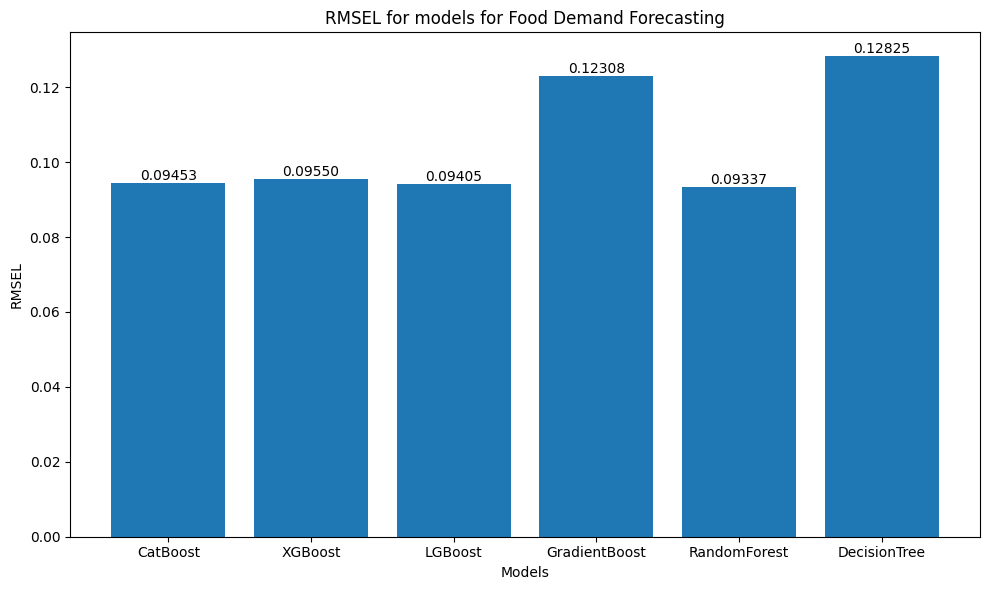

In [177]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models, RMSELs)

plt.title('RMSEL for models for Food Demand Forecasting')
plt.xlabel('Models')
plt.ylabel('RMSEL')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.5f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()
